In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [230]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

def computeTicks (x, step = 5):
    """
    Computes domain with given step encompassing series x
    @ params
    x    - Required - A list-like object of integers or floats
    step - Optional - Tick frequency
    """
    import math as Math
    xMax, xMin = Math.ceil(max(x)), Math.floor(min(x))
    dMax, dMin = xMax + abs((xMax % step) - step) + (step if (xMax % step != 0) else 0), xMin - abs((xMin % step))
    return range(dMin, dMax, step)

In [171]:
class Market:
    def __init__(self, prob, unit, price):
        self.prob = prob
        self.unit = unit
        self.price = price
    
low_volume = Market(0.50, 60000, 10)
high_volume = Market(0.50, 100000, 8)

In [172]:
class UnitCost:
    def __init__(self, value):
        self.value = value

low = UnitCost(6)
most_likely = UnitCost(7.5)
high = UnitCost(9)

In [173]:
def calculateProfit():
    value = 0
    fixed_cost = 30000
    unit_cost = np.random.triangular(low.value, most_likely.value, high.value)
    
    prob = np.random.rand()
    if(low_volume.prob > prob):
        value = (high_volume.price - unit_cost) * high_volume.unit
    else:
        value = (low_volume.price - unit_cost) * low_volume.unit
        
    value = value - fixed_cost
    
    return value

In [224]:
lst = []
for x in range(1000):
    profit = calculateProfit()
    lst.append(int(profit))
    
df = pd.DataFrame(lst, columns=['profit'])

In [225]:
df.describe()

,profit
count,1000.000000
mean,69921.778000
std,71100.271714
min,-123847.000000
25%,20242.500000
50%,83015.500000
75%,123611.750000
max,196672.000000


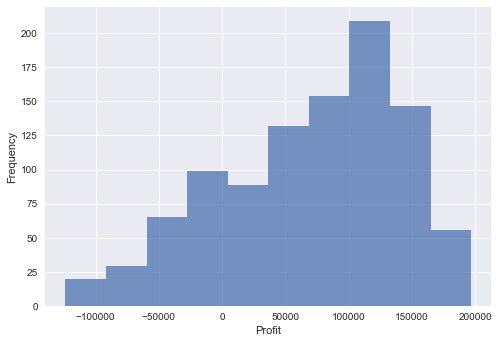

In [226]:
plt.hist(df.profit, 10, normed=False, cumulative=False, alpha=0.75)

plt.ylabel('Frequency')
plt.xlabel('Profit')

plt.show()

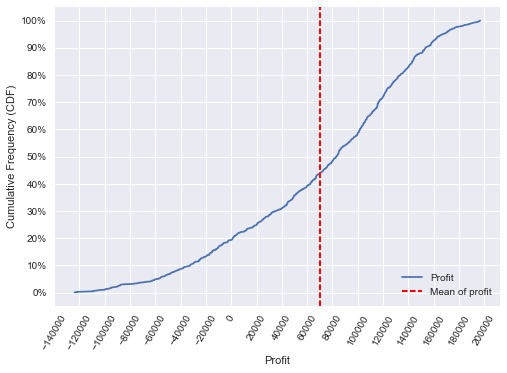

In [231]:
x, y = ecdf(df.profit)

plt.plot(x, y, label='Profit')

plt.axvline(np.mean(x), color='r', linestyle='dashed', linewidth=2, label='Mean of profit')

plt.yticks([0, 0.10, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
           ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
          )

plt.xticks(computeTicks(x, 20000))

plt.legend(loc='lower right')

plt.xticks(rotation=60)

plt.ylabel('Cumulative Frequency (CDF)')
plt.xlabel('Profit')

plt.show()

In [228]:
test = pd.DataFrame(np.transpose([x,y]), columns=['Profit', 'CDF'])

In [229]:
test[(test.CDF == 0.10)]

,Profit,CDF
99,-32470.0,0.1
